<a href="https://colab.research.google.com/github/SampritiMayra/Data_Analysis_prep/blob/main/Final_Capstone_Project_(Summer_Analytics_2022).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This challenge is the capstone project of Summer Analytics, a primer course on Data Science, conducted by Consulting and Analytics Club of IIT Guwahati.

# **Description**

Artificial Intelligence is an integral part of all major e-commerce companies today. Today's online retail platforms are heavily powered by algorithms and applications that use AI. Machine learning is used in a variety of ways, from inventory control and quality assurance in the warehouse to product recommendations and sales demographics on the website.

Let’s say you want to create a promotional campaign for an e-commerce store and offer discounts to customers in the hopes that this might increase your sales.

You have been provided descriptions of products on Amazon and Flipkart, including details like product title, ratings, reviews, and actual prices.

**In this challenge, you will predict discounted prices of the listed products based on their ratings and actual prices.**

The evaluation metric for this competition is RMSE Score.

In [ ]:
#Installing libraries

import matplotlib.pyplot as plt
import pandas as pd
#%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
##Importing Dataset
df = pd.read_csv('/content/gdrive/MyDrive/train.csv')
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [ ]:
data = df.copy()

<Axes: >

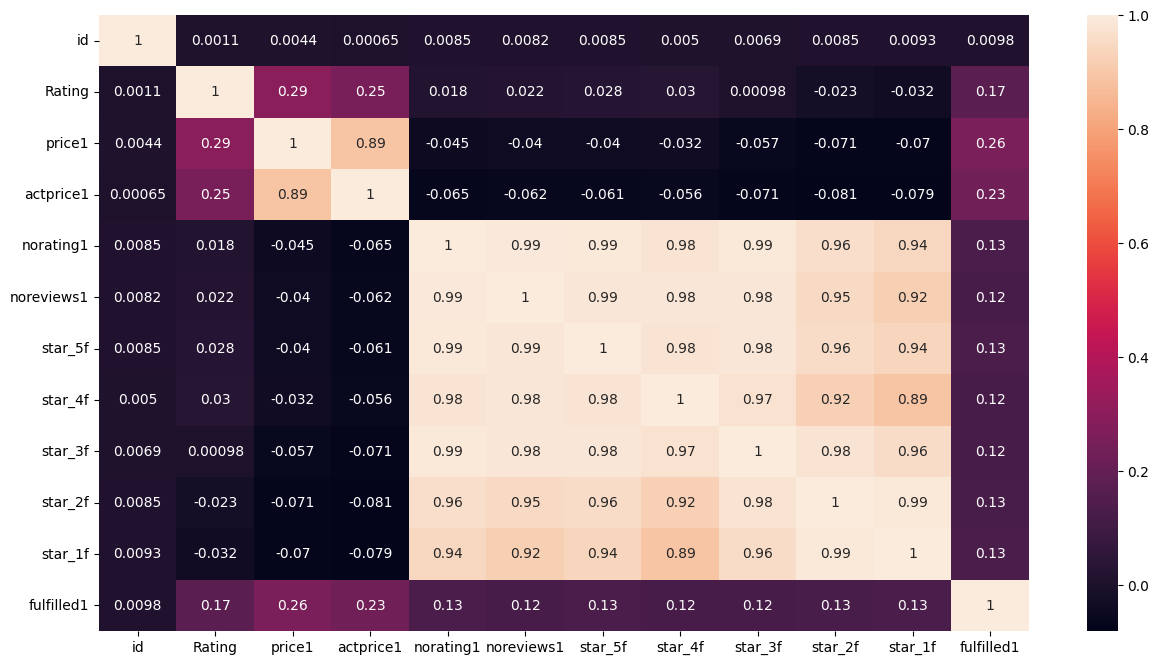

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data.drop(['title', 'maincateg', 'platform'], axis='columns').corr(), annot=True)

In [ ]:
data.columns

Index(['id', 'title', 'Rating', 'maincateg', 'platform', 'price1', 'actprice1',
       'Offer %', 'norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f',
       'star_2f', 'star_1f', 'fulfilled1'],
      dtype='object')

In [ ]:
data.drop(['id','maincateg'], axis =1, inplace = True)


In [ ]:
data.head()

,title,Rating,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,Fashionable & Comfortable Bellies For Women (...,3.9,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,Cilia Mode Leo Sneakers For Women (White),4.4,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,Men Black Sports Sandal,4.2,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,Men Green Sports Sandal,3.9,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


**Making Features from title**

The idea is to look for words that are related to offers/discounts

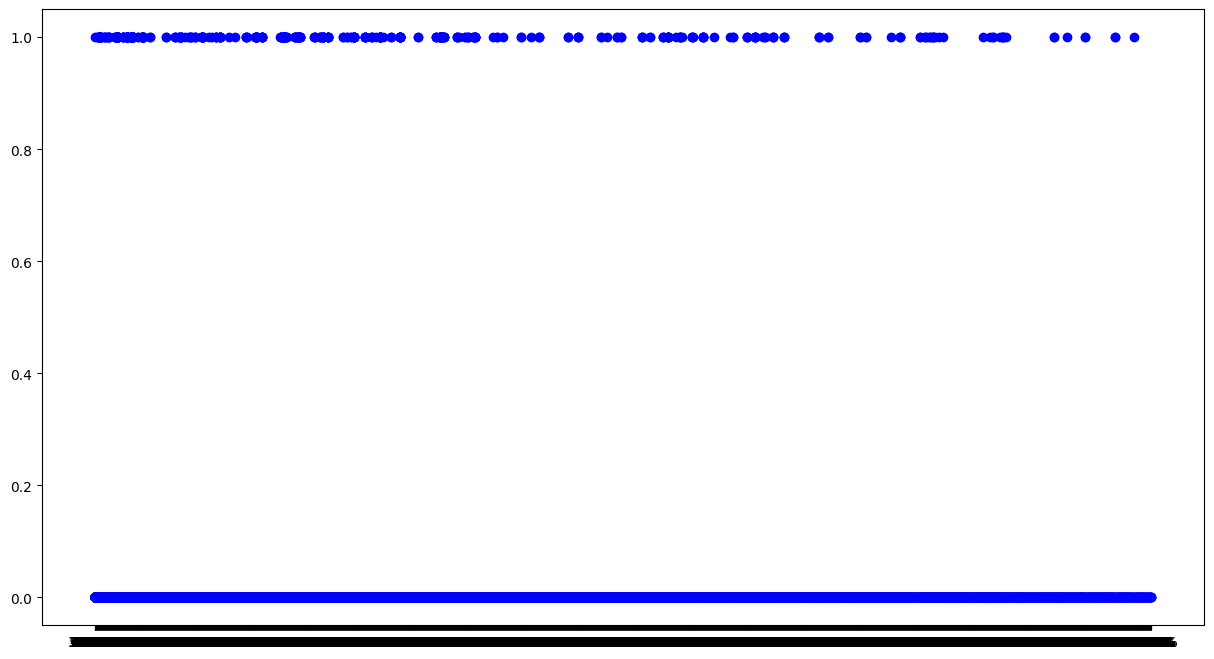

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(data['Offer %'], data['title'].str.upper().str.contains('COMBO').astype(int), 'bo')

From this plot, it seems like product listings with the word 'Combo' are more likely to give high offers, so  added a column combo telling whether the title contains the word combo

In [ ]:
data['combo'] = data['title'].str.upper().str.contains('COMBO').astype(int)
data.head()

,title,Rating,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,combo
0,Fashionable & Comfortable Bellies For Women (...,3.9,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0,0
1,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1,1
2,Cilia Mode Leo Sneakers For Women (White),4.4,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1,0
3,Men Black Sports Sandal,4.2,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1,0
4,Men Green Sports Sandal,3.9,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1,0


In [ ]:
data.drop(['title'], axis = 1, inplace = True)

In [ ]:
data.isnull().sum()

Rating          0
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
combo           0
dtype: int64

In [ ]:
data.shape

(15730, 14)

In [ ]:
data.value_counts().sum()

14947

In [ ]:
data.drop_duplicates(inplace=True)
data.head()

,Rating,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,combo
0,3.9,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0,0
1,3.8,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1,1
2,4.4,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1,0
3,4.2,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1,0
4,3.9,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1,0


In [ ]:
data.shape

(11146, 14)

In [ ]:
data.dtypes

Rating        float64
platform       object
price1          int64
actprice1       int64
Offer %        object
norating1     float64
noreviews1    float64
star_5f       float64
star_4f       float64
star_3f       float64
star_2f         int64
star_1f         int64
fulfilled1      int64
combo           int64
dtype: object

In [ ]:
data.keys()

Index(['Rating', 'platform', 'price1', 'actprice1', 'Offer %', 'norating1',
       'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f',
       'fulfilled1', 'combo'],
      dtype='object')

In [ ]:
data['Offer %'] = data['Offer %'].str.replace('%','').astype(float)

In [ ]:
data.head()

,Rating,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,combo
0,3.9,Flipkart,698,999,30.13,38.0,7.0,17.0,9.0,6.0,3,3,0,0
1,3.8,Flipkart,999,1999,50.03,531.0,69.0,264.0,92.0,73.0,29,73,1,1
2,4.4,Flipkart,2749,4999,45.01,17.0,4.0,11.0,3.0,2.0,1,0,1,0
3,4.2,Flipkart,518,724,15.85,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1,0
4,3.9,Flipkart,1379,2299,40.02,77.0,3.0,35.0,21.0,7.0,7,7,1,0


In [ ]:
data.dtypes

Rating        float64
platform       object
price1          int64
actprice1       int64
Offer %       float64
norating1     float64
noreviews1    float64
star_5f       float64
star_4f       float64
star_3f       float64
star_2f         int64
star_1f         int64
fulfilled1      int64
combo           int64
dtype: object

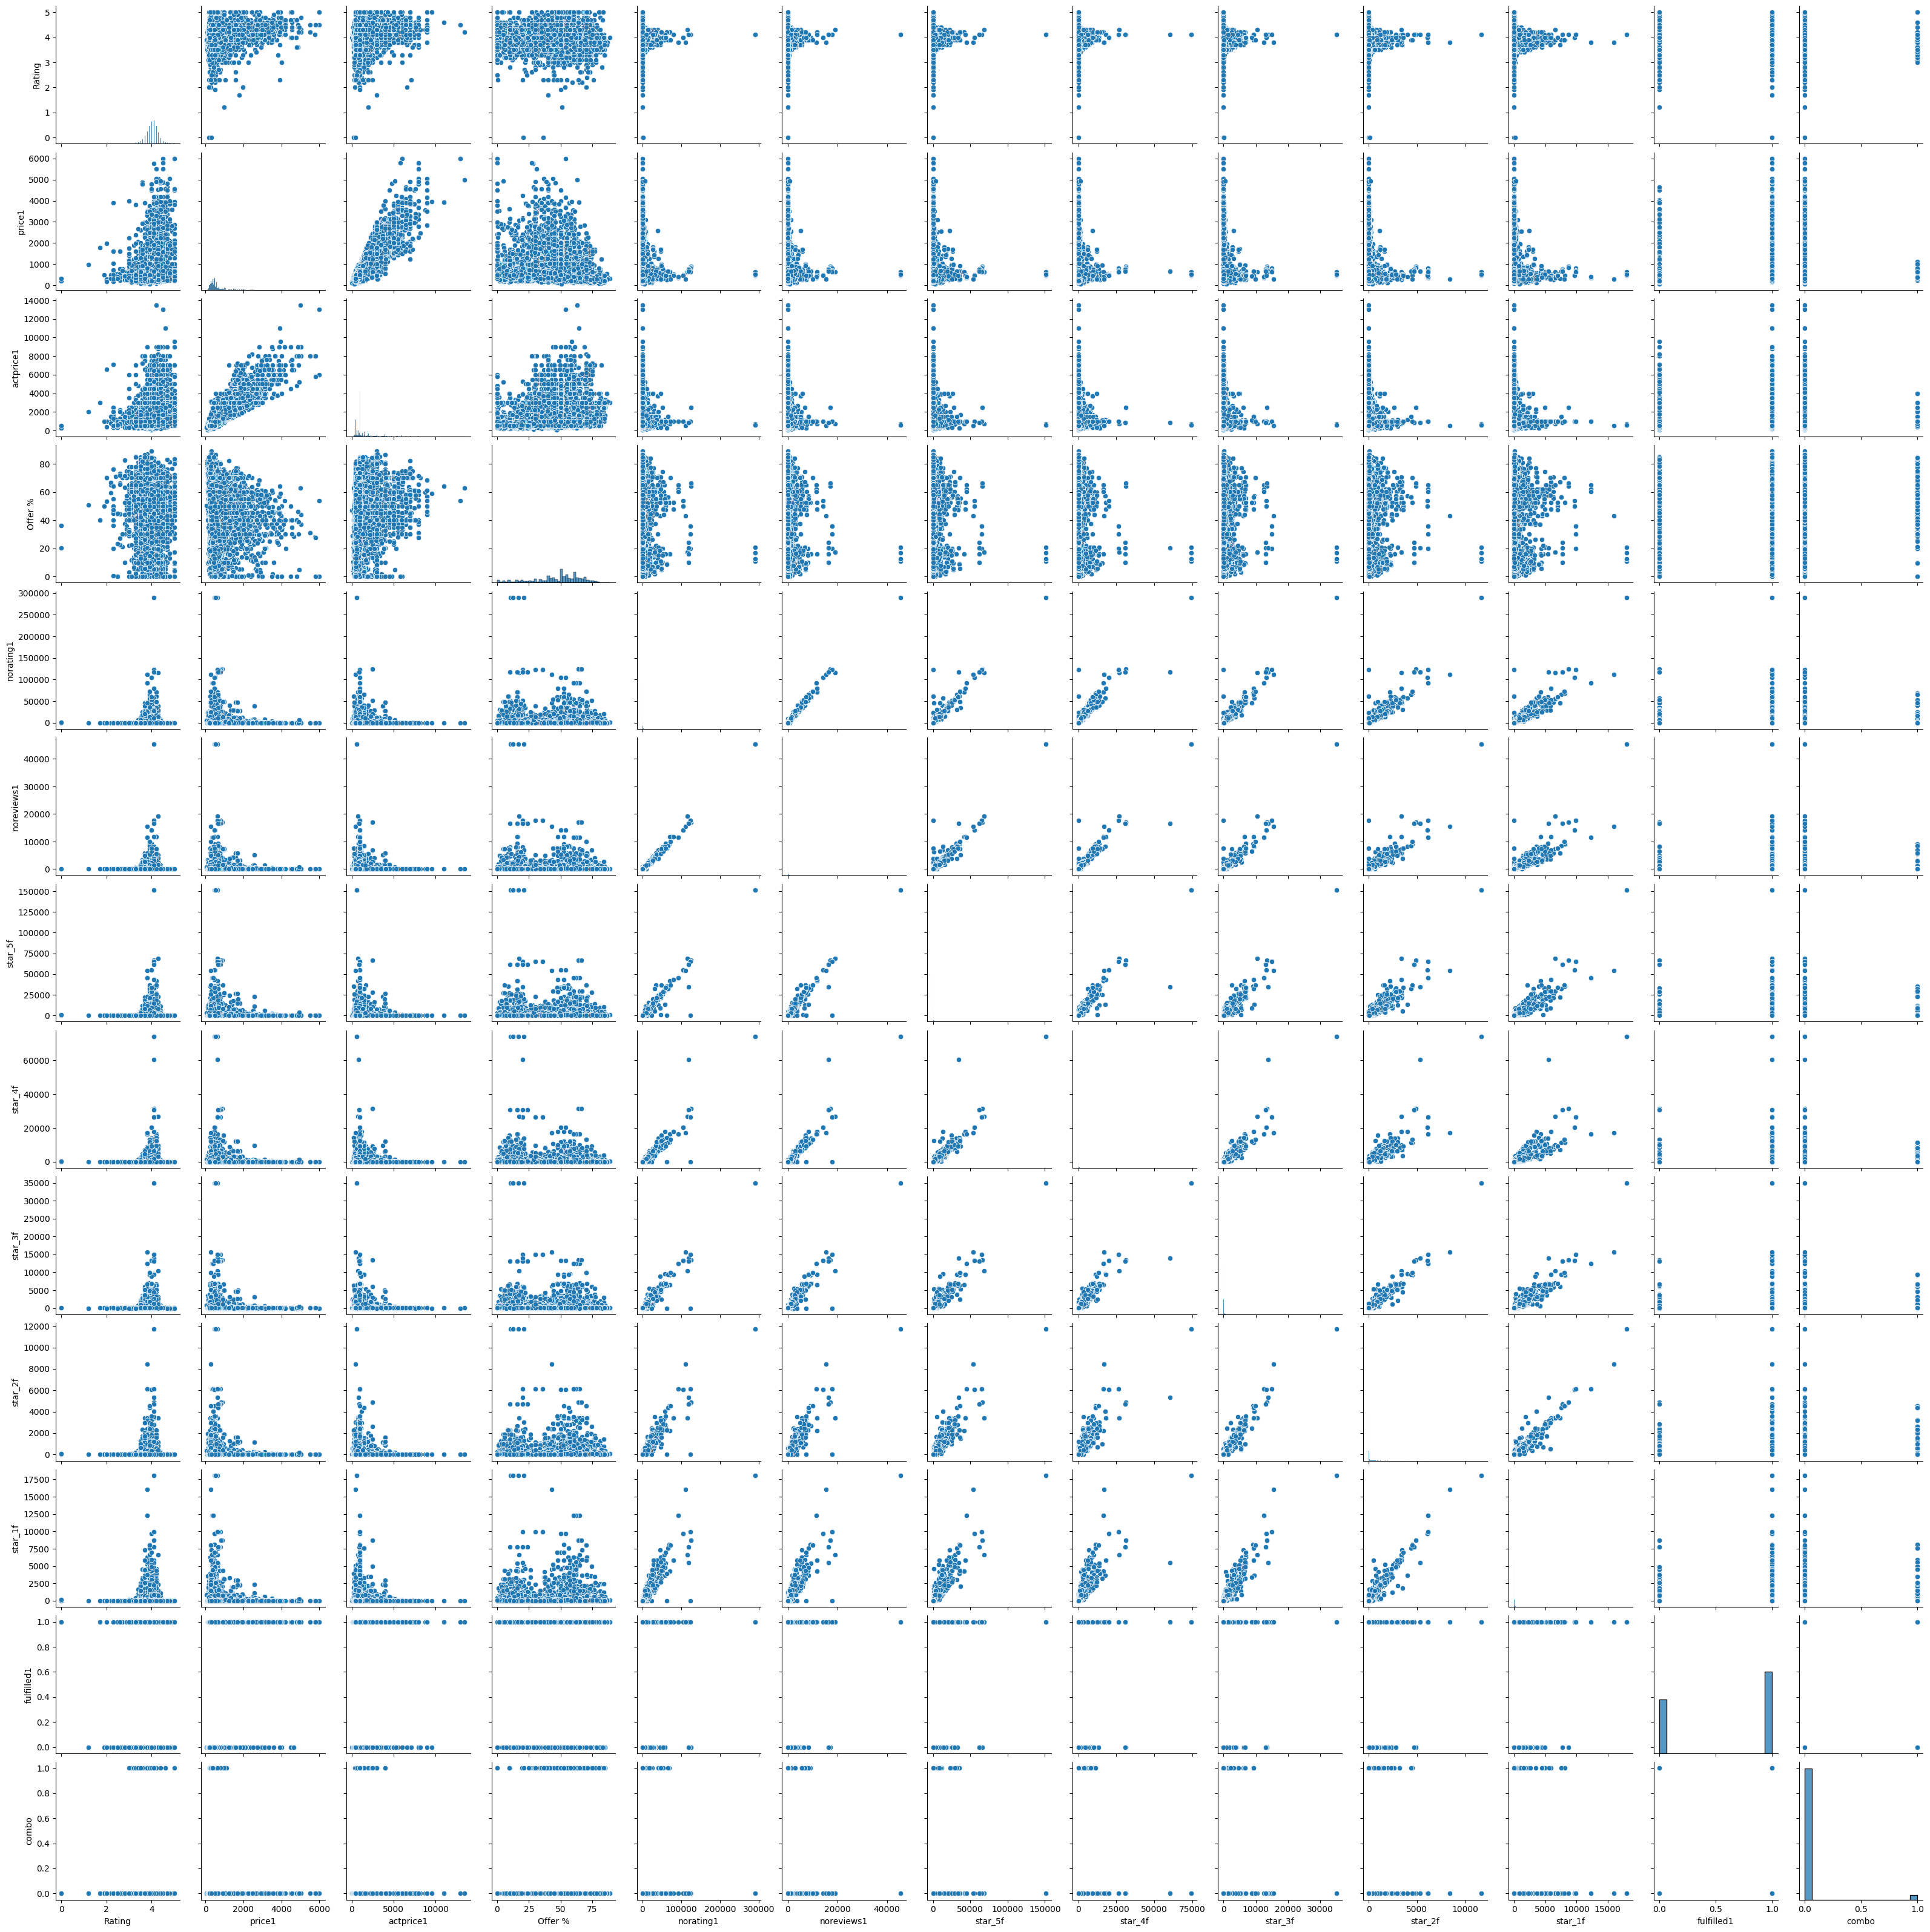

In [ ]:
sns.pairplot(data)

The main conclusion from this was that XGBRegressor is the best suited model to impute star_f columns and linear regression is best suited model for imputing noreviews1 from norating1

Also distribution of data from all star_f columns is identical nature, this can also be inferred from the correlation matrix which shows that all star_f columns, norating1 and noreview1 is highly correlated data

**star_f and norating1 Null Values**

impute the null values of star_f columns using XGBRegressor Model

For norating1 column (number of ratings) we can fill null values using sum of all star_f columns

In [ ]:
from xgboost import XGBRegressor
lrm5 = XGBRegressor()
X_lrm5 = np.array(data.loc[data['star_5f'].notna(), ['Rating', 'star_2f', 'star_1f']])
y_lrm5 = np.array(data[data['star_5f'].notna()]['star_5f'])
lrm5.fit(X_lrm5, y_lrm5)

data.loc[data['star_5f'].isnull(), 'star_5f'] = lrm5.predict(np.array(data.loc[data['star_5f'].isnull(), ['Rating', 'star_2f', 'star_1f']]))

In [ ]:
lrm4 = XGBRegressor()
X_lrm4 = np.array(data.loc[data['star_4f'].notna(), ['Rating', 'star_2f', 'star_1f']])
y_lrm4 = np.array(data[data['star_4f'].notna()]['star_4f'])
lrm4.fit(X_lrm4, y_lrm4)

data.loc[data['star_4f'].isnull(), 'star_4f'] = lrm4.predict(np.array(data.loc[data['star_4f'].isnull(), ['Rating', 'star_2f', 'star_1f']]))

In [ ]:
lrm3 = XGBRegressor()
X_lrm3 = np.array(data.loc[data['star_3f'].notna(), ['Rating', 'star_2f', 'star_1f']])
y_lrm3 = np.array(data[data['star_3f'].notna()]['star_3f'])
lrm3.fit(X_lrm3, y_lrm3)

data.loc[data['star_3f'].isnull(), 'star_3f'] = lrm3.predict(np.array(data.loc[data['star_3f'].isnull(), ['Rating', 'star_2f', 'star_1f']]))

In [ ]:
data.loc[data['norating1'].isnull(), 'norating1'] = data.loc[data['norating1'].isnull(), 'star_5f'] + data.loc[data['norating1'].isnull(), 'star_4f'] + data.loc[data['norating1'].isnull(), 'star_3f'] + data.loc[data['norating1'].isnull(), 'star_2f'] + data.loc[data['norating1'].isnull(), 'star_1f']

<Axes: xlabel='norating1', ylabel='noreviews1'>

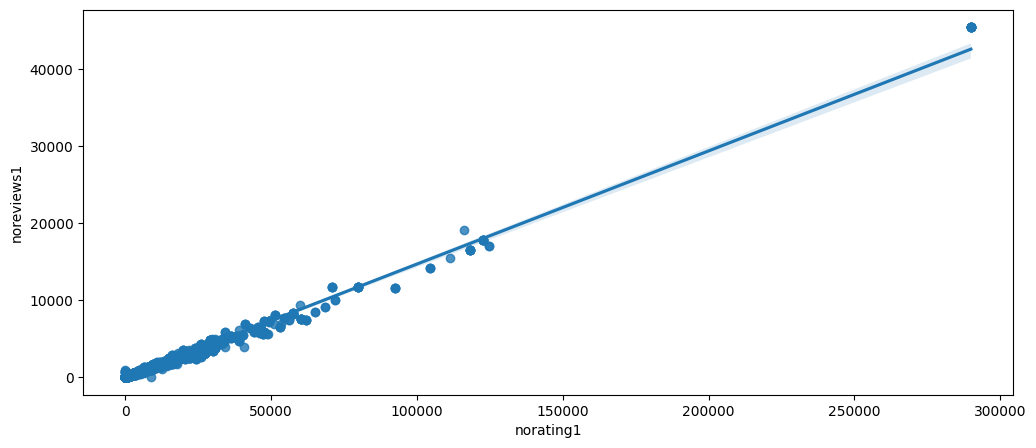

In [ ]:
plt.figure(figsize = (12,5))
sns.regplot(data = data, x = data['norating1'],y = data['noreviews1'])

Judging the plot between norating1 and noreviews1, i decided to use linear regression model to impute noreviews1 null values

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression  # for Linear Regression algorithm

In [ ]:
lrm = LinearRegression()
X_lrm = data[data['noreviews1'] < 20000]['norating1'].values.reshape(-1,1)
y_lrm = data[data['noreviews1'] < 20000]['noreviews1'].values
lrm.fit(X_lrm, y_lrm)

data.loc[data['noreviews1'].isnull(), 'noreviews1'] = lrm.predict(data[data['noreviews1'].isnull()]['norating1'].values.reshape(-1,1))

In [ ]:
data.isnull().sum()

Rating        0
platform      0
price1        0
actprice1     0
Offer %       0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
combo         0
dtype: int64

In [ ]:
#Handling Missing Values

#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import SimpleImputer, IterativeImputer


In [ ]:
#cont_feats = [col for col in data.columns if data[col].dtype != object]
#cont_feats = ['norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f']
#print(f'The Continuous features are {cont_feats}')
# Iterative Imputation
#iter_imputer = IterativeImputer()
#data[cont_feats] = iter_imputer.fit_transform(data[cont_feats])
#data[cont_feats] = pd.DataFrame(iter_imputed, columns=cont_feats)


In [ ]:
#data.isnull()

In [ ]:
# Searching for categorical variables

#cat_feats = [col for col in data.columns if data[col].dtype == object]
#print('Categorical features:', cat_feats)

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer
#columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), ['platform'])], remainder='passthrough')

In [ ]:
#platform column is not relevant
data.drop(['platform'], axis = 1, inplace = True)
data.head()

,Rating,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,combo
0,3.9,698,999,30.13,38.0,7.0,17.0,9.0,6.0,3,3,0,0
1,3.8,999,1999,50.03,531.0,69.0,264.0,92.0,73.0,29,73,1,1
2,4.4,2749,4999,45.01,17.0,4.0,11.0,3.0,2.0,1,0,1,0
3,4.2,518,724,15.85,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1,0
4,3.9,1379,2299,40.02,77.0,3.0,35.0,21.0,7.0,7,7,1,0


<Axes: xlabel='actprice1', ylabel='Density'>

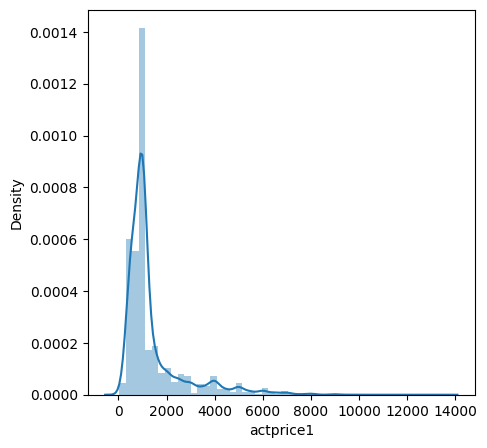

In [ ]:
plt.figure(figsize = (5,5))
sns.distplot(data['actprice1'])

<Axes: xlabel='price1', ylabel='Density'>

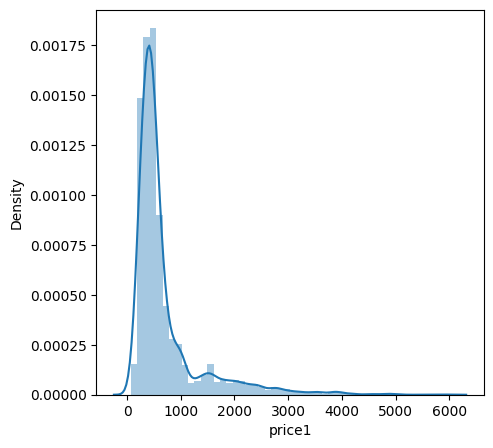

In [ ]:
plt.figure(figsize = (5,5))
sns.distplot(data['price1'])


<Axes: xlabel='Offer %', ylabel='Density'>

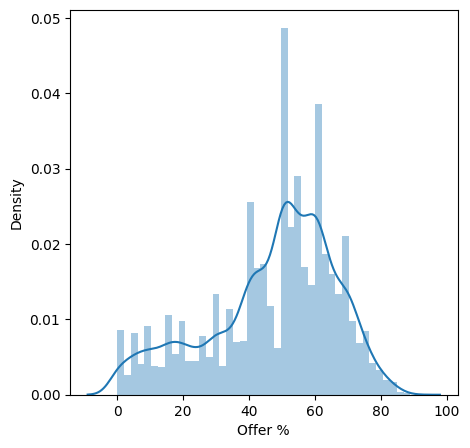

In [ ]:
plt.figure(figsize = (5,5))
sns.distplot(data['Offer %'])

<Axes: xlabel='norating1', ylabel='Density'>

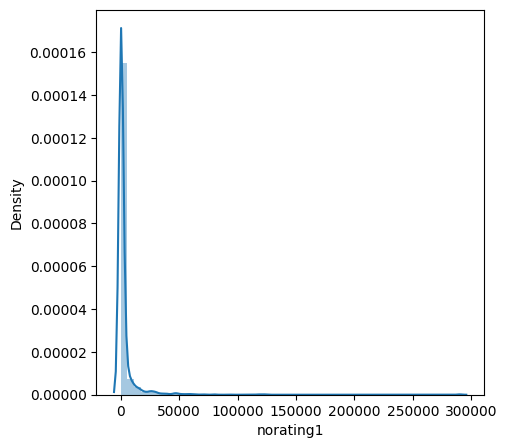

In [ ]:
plt.figure(figsize = (5,5))
sns.distplot(data['norating1'])

<Axes: xlabel='Rating', ylabel='Density'>

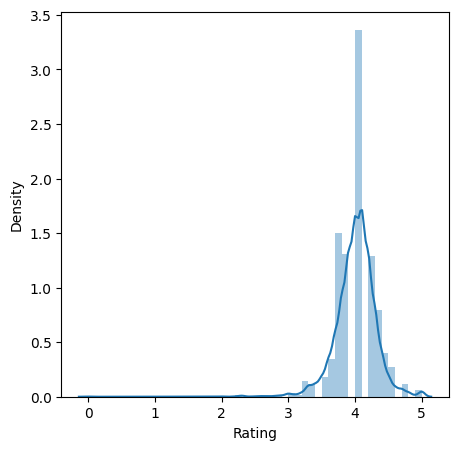

In [ ]:
plt.figure(figsize = (5,5))
sns.distplot(data['Rating'])

<Axes: xlabel='noreviews1', ylabel='Density'>

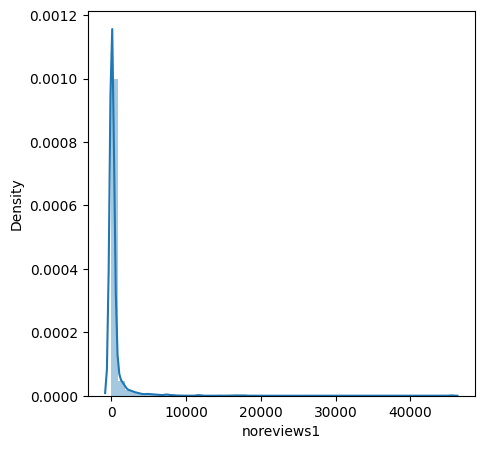

In [ ]:
plt.figure(figsize = (5,5))
sns.distplot(data['noreviews1'])

Distribution of Rating column is very close to a normal distibution.

The distribution of norating1 and noreviews1 column is heavily skewed, this is because of a continuous distribution of outliers from 5000-30000 while most of the data is in less than 1000 range.

actprice1 and price1 are not 'perfect' normal distributions and are slightly skewed.

Offer % is a column that will not be used as it is not provided in testing data, its just easier to understand

  **Conclusion:**

  We cannot implement any changes on the norating1 and noreviews1 column because this sort of distribution is expected(it could be a wrong assumption) and we cannot drop data as outliers, as there will be products that sell more and have more number of reviews & rating but that does not tell us much about quality of product or expected offer % on that product, it only tells that this product is well marketed and sold more units.

Looking at the distribution of the columns 'actprice1', 'price', We decided to try making actprice1 column more normally distributed as that would help the model and would also match the distribution of output column price1 better

In [ ]:

import scipy.stats as stats
import pylab

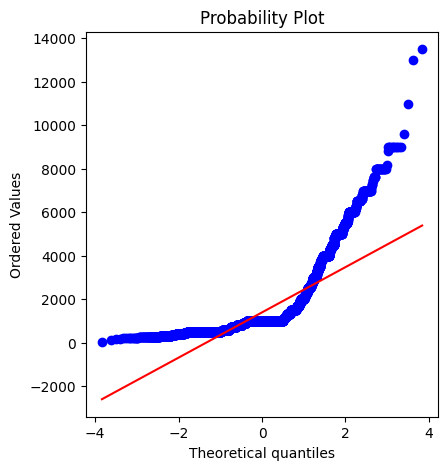

In [ ]:
#Plotting a Q-Q plot
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
stats.probplot(data['actprice1'],plot=pylab)   # No Transformation
plt.show()

((array([-3.83734421, -3.61367096, -3.49094083, ...,  3.49094083,
          3.61367096,  3.83734421]),
  array([3.73766962, 4.67282883, 5.14749448, ..., 9.30555964, 9.47262771,
         9.51037089])),
 (0.6345701211113496, 6.980175741414226, 0.9581975187192889))

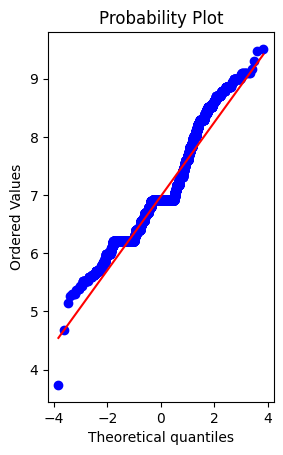

In [ ]:
plt.subplot(1,2,2)
stats.probplot(np.log(data['actprice1']),plot=pylab)   # Log Transformation

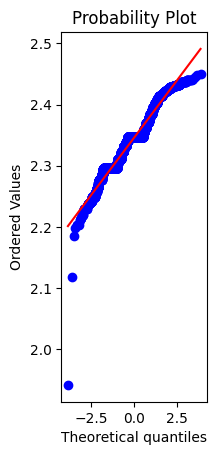

In [ ]:
var, _ = stats.boxcox(data['actprice1'])
plt.subplot(1,3,3)
stats.probplot(var,plot=pylab)   # BoxCox Transformation

plt.show()

((array([-3.83734421, -3.61367096, -3.49094083, ...,  3.49094083,
          3.61367096,  3.83734421]),
  array([  6.4807407 ,  10.34408043,  13.11487705, ..., 104.8761174 ,
         114.01315714, 116.18519699])),
 (12.101884870684138, 34.81560001101076, 0.8962702184374669))

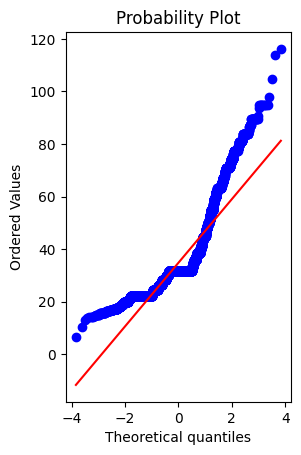

In [ ]:
plt.subplot(1,2,2)
stats.probplot(np.sqrt(data['actprice1']),plot=pylab)   # Log Transformation

((array([-3.83734421, -3.61367096, -3.49094083, ...,  3.49094083,
          3.61367096,  3.83734421]),
  array([ 3.47602664,  4.7474594 ,  5.56129777, ..., 22.23912695,
         23.51274396, 23.81042784])),
 (2.365176999860143, 10.512877009628276, 0.9205983016837497))

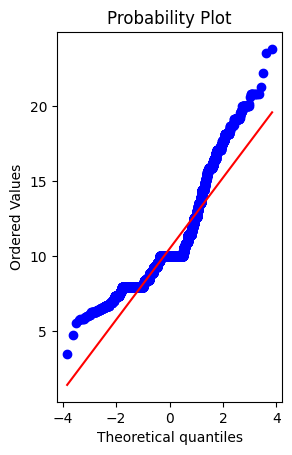

In [ ]:
plt.subplot(1,2,2)
stats.probplot(np.cbrt(data['actprice1']),plot=pylab)   # Log Transformation

Based on these transformations I added logprice column by taking log of actprice1 column

In [ ]:
data['logprice'] = np.log(data['actprice1'])

**Predictive Modelling**

In [ ]:
Y = data['price1']

In [ ]:
X = data.drop('price1', axis = 1)

In [ ]:
# We will split the data into training and testing data

train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.2,random_state=0)

train_x.shape, train_y.shape

((8916, 13), (8916,))

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression  # for Linear Regression algorithm
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm


In [ ]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(train_x, train_y)

LinearRegression()

In [ ]:
y_pred1 = lin_reg.predict(test_x)
y_pred1

array([1345.01528135,  373.73348743, 3073.12381678, ..., 1034.88276103,
         90.60030106, 1941.06701468])

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse1 = sqrt(mean_squared_error(test_y, y_pred1))
rmse1

185.58888614712257

In [ ]:
from sklearn.model_selection import cross_val_score

#cv=10
scores = cross_val_score(lin_reg, train_x, train_y, cv=10)
print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

Cross-validation scores: [0.89802845 0.90927901 0.91783928 0.91125713 0.91360663 0.90119596
 0.92236924 0.92004055 0.88455492 0.92163543]
Average cross-validation score: 0.9099806590710766


In [ ]:
#Decision Trees Algo
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

tree_model = DecisionTreeRegressor()
parameter = {}
grid_dt = GridSearchCV(tree_model, param_grid = parameter, cv =10, scoring = 'neg_root_mean_squared_error')
grid_dt.fit(train_x, train_y)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), param_grid={},
             scoring='neg_root_mean_squared_error')

In [ ]:
y_pred2 = grid_dt.best_estimator_.predict(test_x)
y_pred2

array([1374.,  524., 3003., ...,  999.,  141., 1620.])

In [ ]:
rmse2 = sqrt(mean_squared_error(test_y, y_pred2))
rmse2

51.135689536708306

In [ ]:
#cv=10
scores_dt = cross_val_score(grid_dt.best_estimator_ , train_x, train_y, cv=10)
print(f'Cross-validation scores: {scores_dt}')
print(f'Average cross-validation score: {scores_dt.mean()}')

Cross-validation scores: [0.99467424 0.99481237 0.98679858 0.99185293 0.99384439 0.99635537
 0.99544296 0.99497931 0.9939977  0.99351865]
Average cross-validation score: 0.9936276505877659


In [ ]:
# Random Forest Algorithm
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
parameter = {}
grid_rf = GridSearchCV(rf_model, param_grid = parameter, cv =10, scoring = 'neg_root_mean_squared_error')
grid_rf.fit(train_x, train_y)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), param_grid={},
             scoring='neg_root_mean_squared_error')

In [ ]:
y_pred3 = grid_rf.best_estimator_.predict(test_x)
y_pred3

array([1374.24,  524.03, 3066.8 , ..., 1001.43,  283.57, 1787.69])

In [ ]:
rmse3 = sqrt(mean_squared_error(test_y, y_pred3))
rmse3

31.290599583373204

In [ ]:
#cv=10
scores_rf = cross_val_score(grid_rf.best_estimator_ , train_x, train_y, cv=10)
print(f'Cross-validation scores: {scores_rf}')
print(f'Average cross-validation score: {scores_rf.mean()}')

Cross-validation scores: [0.99533813 0.99750675 0.99505393 0.99427464 0.99074003 0.99830993
 0.99795649 0.9982834  0.99514726 0.99699624]
Average cross-validation score: 0.9959606793056425


In [ ]:
# XGB Algorithm

from xgboost import XGBRegressor
xgb_model = XGBRegressor()
parameter_xgb ={}
grid_xgb = GridSearchCV(xgb_model, param_grid = parameter_xgb, cv =10, scoring = 'neg_root_mean_squared_error')
grid_xgb.fit(train_x, train_y)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={}, scoring='neg_root_mean_squared_error')

In [ ]:
y_pred4 = grid_xgb.best_estimator_.predict(test_x)
y_pred4

array([1354.7163 ,  523.68555, 3067.7761 , ..., 1006.79376,  296.46677,
       1787.6143 ], dtype=float32)

In [ ]:
rmse4 = sqrt(mean_squared_error(test_y, y_pred4))
rmse4

33.76884272867644

In [ ]:
#cv=10
scores_xgb = cross_val_score(grid_xgb.best_estimator_ , train_x, train_y, cv=10)
print(f'Cross-validation scores: {scores_xgb}')
print(f'Average cross-validation score: {scores_xgb.mean()}')

Cross-validation scores: [0.99662415 0.99725293 0.99660077 0.99769466 0.9956394  0.99823279
 0.99762232 0.99824224 0.99448386 0.99697017]
Average cross-validation score: 0.9969363297993858


In [ ]:
# Adaboost Algorithm
from sklearn.ensemble import AdaBoostRegressor

ad_model = AdaBoostRegressor()
parameter_ad ={}
grid_ad = GridSearchCV(ad_model, param_grid = parameter_ad, cv =10, scoring = 'neg_root_mean_squared_error')
grid_ad.fit(train_x, train_y)


GridSearchCV(cv=10, estimator=AdaBoostRegressor(), param_grid={},
             scoring='neg_root_mean_squared_error')

In [ ]:
y_pred5 = grid_ad.best_estimator_.predict(test_x)
y_pred5

array([1492.14776632,  588.55965909, 3514.61085973, ..., 1189.48424069,
        496.09722222, 1667.08893281])

In [ ]:
rmse5 = sqrt(mean_squared_error(test_y, y_pred5))
rmse5

185.57248514661674

XGBRegressor is performing the best among other models used here,

 RMSE = 33.76884272867644

Average cross-validation score: 0.9969363297993858

In [ ]:
# Using Test data
##Importing Dataset
test_data = pd.read_csv('/content/gdrive/MyDrive/test_capstone.csv')

In [ ]:
Y = data['price1']
X = data.drop('price1', axis =1)

In [ ]:
xgb_model = XGBRegressor()
parameter_xgb ={}
grid_xgb = GridSearchCV(xgb_model, param_grid = parameter_xgb, cv =10, scoring = 'neg_root_mean_squared_error')
grid_xgb.fit(X, Y)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={}, scoring='neg_root_mean_squared_error')

In [ ]:
final_pred = grid_xgb.best_estimator_.predict(X)
final_pred

array([ 704.0705 , 1001.713  , 2758.6904 , ...,  199.67822,  503.00497,
        329.10074], dtype=float32)

In [ ]:
rmse_test = sqrt(mean_squared_error(Y, final_pred))
rmse_test

13.872404929667066

In [ ]:
#cv=10
scores_result = cross_val_score(grid_xgb.best_estimator_ , X, Y, cv=10)
print(f'Cross-validation scores: {scores_result}')
print(f'Average cross-validation score: {scores_result.mean()}')

Cross-validation scores: [0.99829427 0.9982397  0.9973435  0.99745406 0.99496014 0.99808327
 0.99796136 0.99594898 0.99549869 0.99723865]
Average cross-validation score: 0.9971022642085053


In [ ]:
##Importing SAmple Dataset
Sample_submission = pd.read_csv('/content/gdrive/MyDrive/Sample__submission.csv')
Sample_submission.head()

,id,price1
0,19841,193
1,19157,340
2,19445,637
3,8046,679
4,4571,190


In [ ]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(final_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'], final_pred],axis=1)
datasets.columns=['Id','price1']
datasets.to_csv('sample_submission.csv',index=False)

FileNotFoundError: ignored

In [ ]:
Sample_submission.isnull().sum()

In [ ]:
Sample_submission.shape

In [ ]:
#test_data['final_pred'] = np.round(final_pred)
#test_data['id'] = test_data['id']
test_data['final_pred'] =  final_pred.tolist()


In [ ]:
Sample_submission = Sample_submission.merge(test_data[['final_pred','id']],on = 'id',how = 'left')
Sample_submission = Sample_submission.drop('price1',axis = 'columns')
Sample_submission.columns = ['id','price1']
Sample_submission.to_csv("submission.csv", index=False)
Sample_submission

In [ ]:
result_df = pd.merge([test_data], [final_pred], how = 'left_on', left_index = True, right_index = True)

In [ ]:
from google.colab import files
test_data.to_csv('capstone_submission.csv', encoding = 'utf-8-sig')
files.download('capstone_submission.csv')

In [ ]:
# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout



In [ ]:
# Let's initialize the ANN
model = Sequential()

In [ ]:
# Adding the input layer
model.add(Dense(units = 20, activation = 'relu'))

In [ ]:
# Adding the first hidden layer
model.add(Dense(units = 15, activation = 'relu'))

In [ ]:
# Adding the second hidden layer
model.add(Dense(units = 11, activation = 'relu'))

In [ ]:
# Adding the third hidden layer
model.add(Dense(units = 7, activation = 'relu'))

In [ ]:
# Adding the fourth hidden layer
model.add(Dense(units = 4, activation = 'relu'))

In [ ]:
# Adding the output layer
model.add(Dense(units = 1, activation = 'linear'))

In [ ]:
# We're using Adam optimizer since it works the best
# for loss function we're using binary_crossentropy because the problem we're solving is a binary classification.
model.compile(optimizer = 'Adamax', loss = 'mean_squared_error')

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [ ]:
# Implementation of early stopping and Saving best model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
# Let's fit the model
model_history = model.fit(train_x , train_y, validation_split = 0.2, batch_size = 10, epochs = 1000,callbacks = [es, mc])

Epoch 1/1000
713/714 [============================>.] - ETA: 0s - loss: 94295.6406
Epoch 1: val_loss improved from inf to 94047.92969, saving model to best_model.h5
714/714 [==============================] - 3s 4ms/step - loss: 94311.9922 - val_loss: 94047.9297
Epoch 2/1000
711/714 [============================>.] - ETA: 0s - loss: 93372.1406
Epoch 2: val_loss did not improve from 94047.92969
714/714 [==============================] - 3s 4ms/step - loss: 93404.5000 - val_loss: 94792.4766
Epoch 3/1000
706/714 [============================>.] - ETA: 0s - loss: 92420.9297
Epoch 3: val_loss improved from 94047.92969 to 92161.11719, saving model to best_model.h5
714/714 [==============================] - 3s 4ms/step - loss: 92176.9609 - val_loss: 92161.1172
Epoch 4/1000
710/714 [============================>.] - ETA: 0s - loss: 91109.9062
Epoch 4: val_loss did not improve from 92161.11719
714/714 [==============================] - 4s 5ms/step - loss: 90897.9844 - val_loss: 94405.2031
Epoch 

In [ ]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 6.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner
from keras_tuner.tuners import RandomSearch

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error', # Use accuracy_score in case of classification problem
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='Capstone Project')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.search(train_x , train_y,
             epochs=5,
             validation_data=(test_x, test_y))

Trial 5 Complete [00h 00m 34s]
val_mean_absolute_error: 122.89120992024739

Best val_mean_absolute_error So Far: 122.89120992024739
Total elapsed time: 00h 05m 43s


In [ ]:
best_model = tuner.get_best_models()

NameError: ignored

In [ ]:
y_pred = best_model.predict(data.drop(['price1'],axis=1).values)

NameError: ignored

In [ ]:
from keras import backend as K
def root_mean_squared_error(test_y, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - test_y)))

In [ ]:
rmse_test = sqrt(mean_squared_error(Y, y_pred))
rmse_test

NameError: ignored